# White Chocolate Mochas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set(font_scale=1.2)
%matplotlib inline


In [2]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv', index_col=0)

In [3]:
df.head()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Coffee to Frappuccino® Blended Crème
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage                   242 non-null    object 
 1   Beverage_prep              242 non-null    object 
 2   Calories                   242 non-null    int64  
 3    Total Fat (g)             242 non-null    object 
 4   Trans Fat (g)              242 non-null    float64
 5   Saturated Fat (g)          242 non-null    float64
 6    Sodium (mg)               242 non-null    int64  
 7    Total Carbohydrates (g)   242 non-null    int64  
 8   Cholesterol (mg)           242 non-null    int64  
 9    Dietary Fibre (g)         242 non-null    int64  
 10   Sugars (g)                242 non-null    int64  
 11   Protein (g)               242 non-null    float64
 12  Vitamin A (% DV)           242 non-null    object 
 13  Vitamin C (% DV)           

In [6]:
df.shape

(242, 17)

## Data Wrangling
We want to do two things here: <br>
> 1. Remove the percentage signs <br>
> 2. Change data type to float for everything barring the index and beverage and beverage_prep columns. 

### Data Cleaning

In [7]:
percent_columns = ['Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ']
df[percent_columns] = df[percent_columns].replace({'%':''}, regex = True)

In [8]:
df['Vitamin A (% DV) '] = df['Vitamin A (% DV) '].astype(float)
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].astype(float)
df[' Calcium (% DV) '] = df[' Calcium (% DV) '].astype(float)
df['Iron (% DV) '] = df['Iron (% DV) '].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Coffee to Frappuccino® Blended Crème
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage                   242 non-null    object 
 1   Beverage_prep              242 non-null    object 
 2   Calories                   242 non-null    int64  
 3    Total Fat (g)             242 non-null    object 
 4   Trans Fat (g)              242 non-null    float64
 5   Saturated Fat (g)          242 non-null    float64
 6    Sodium (mg)               242 non-null    int64  
 7    Total Carbohydrates (g)   242 non-null    int64  
 8   Cholesterol (mg)           242 non-null    int64  
 9    Dietary Fibre (g)         242 non-null    int64  
 10   Sugars (g)                242 non-null    int64  
 11   Protein (g)               242 non-null    float64
 12  Vitamin A (% DV)           242 non-null    float64
 13  Vitamin C (% DV)           

### Data Imputations

In [10]:
df = df.replace('Varies', np.nan)
df = df.replace('varies', np.nan)
df['Caffeine (mg)'] = df['Caffeine (mg)'].astype(float)

For the Total Fat (g) column, there happens to be an entry with 3 2 which looks like should be 3.2, so we'll go ahead and replace this value. 

In [11]:
df[df[' Total Fat (g)']== '3 2'] = df[df[' Total Fat (g)']== '3.2']
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype(float)

In [12]:
df = df.fillna(df.mean())

In [13]:
df.isnull().sum()

Beverage                     1
Beverage_prep                1
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [14]:
df[df['Beverage'].isnull()] 

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Frappuccino® Blended Crème,NaN,NaN,193.348548,2.903734,1.310788,0.037759,6.390041,128.381743,35.863071,0.804979,32.834025,6.986722,9.846473,3.630705,20.759336,7.435685,89.931193


In [15]:
df = df.dropna(axis = 0)

### Units

In [16]:
df[['Trans Fat (g) ','Saturated Fat (g)',' Total Carbohydrates (g) ',' Dietary Fibre (g)',' Sugars (g)', ' Protein (g) ']] = df[['Trans Fat (g) ','Saturated Fat (g)',' Total Carbohydrates (g) ',' Dietary Fibre (g)',' Sugars (g)', ' Protein (g) ']]* 1000

In [17]:
df = df.rename({'Beverage':'Beverage' , 'Beverage_prep': 'Beverage_prep', 'Calories':'Calories', ' Total Fat (g)':'Total_Fat(mg)',
                  'Trans Fat (g) ': 'Trans_Fat (mg)', 'Saturated Fat (g)': 'Saturated_Fat(mg)', ' Sodium (mg)':'Sodium(mg)',
                  ' Total Carbohydrates (g) ':'Total_Carbohydrates(mg)', 'Cholesterol (mg)':'Cholesterol(mg)', ' Dietary Fibre (g)':'Dietary_Fibre(mg)',
                  ' Sugars (g)':'Sugars(mg)', ' Protein (g) ':'Protein(mg)', 'Vitamin A (% DV) ':'VitaminA(% DV)', 'Vitamin C (% DV)':'VitaminC(% DV)',
                  ' Calcium (% DV) ':'Calcium(% DV)', 'Iron (% DV) ':'Iron(% DV)', 'Caffeine(mg)':'Caffeine(mg)'}, axis=1)

### Clean Datasets

In [18]:
clean_data = df
clean_data.shape

(241, 17)

In [19]:
signature_espresso = clean_data[clean_data.index == 'Signature Espresso Drinks']

In [20]:
white_chocolate = df[df['Beverage'].str.contains('White Chocolate')]

In [21]:
white_chocolate.head(3)

,Beverage,Beverage_prep,Calories,Total_Fat(mg),Trans_Fat (mg),Saturated_Fat(mg),Sodium(mg),Total_Carbohydrates(mg),Cholesterol(mg),Dietary_Fibre(mg),Sugars(mg),Protein(mg),VitaminA(% DV),VitaminC(% DV),Calcium(% DV),Iron(% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Short Nonfat Milk,180.0,3.0,2000.0,0.0,5.0,120000.0,31.0,0.0,29000.0,7000.0,10.0,0.0,25.0,0.0,75.0
Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,200.0,6.0,3500.0,100.0,15.0,125000.0,31.0,0.0,29000.0,7000.0,8.0,2.0,25.0,0.0,75.0
Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,180.0,5.0,2500.0,0.0,0.0,110000.0,28.0,1000.0,25000.0,6000.0,6.0,0.0,25.0,8.0,75.0


In [22]:
white_chocolate.shape

(12, 17)

In [23]:
white_chocolate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Signature Espresso Drinks to Signature Espresso Drinks
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage                 12 non-null     object 
 1   Beverage_prep            12 non-null     object 
 2   Calories                 12 non-null     float64
 3   Total_Fat(mg)            12 non-null     float64
 4   Trans_Fat (mg)           12 non-null     float64
 5   Saturated_Fat(mg)        12 non-null     float64
 6   Sodium(mg)               12 non-null     float64
 7   Total_Carbohydrates(mg)  12 non-null     float64
 8   Cholesterol(mg)          12 non-null     float64
 9   Dietary_Fibre(mg)        12 non-null     float64
 10  Sugars(mg)               12 non-null     float64
 11  Protein(mg)              12 non-null     float64
 12  VitaminA(% DV)           12 non-null     float64
 13  VitaminC(% DV)           12 non-null    

## EDA
### The White Chocolate Mocha
Let's first look and see how the different white chocolate mochas compare to other Signature Espresso Drinks. We expect the smaller the sizes of the drinks the lower their nutritional values. We can also see that there are two other variants: 2% Milk and Soymilk. It'll be interesting to see how these two variants compare to the non-fat milk variants. 

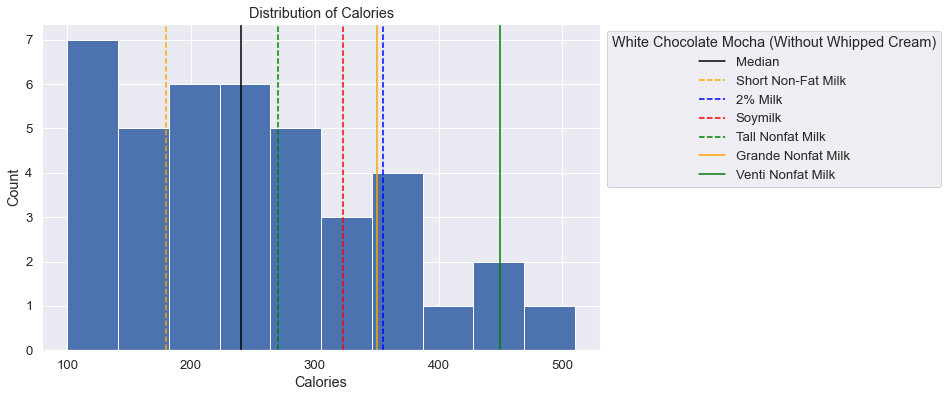

In [24]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Calories'].hist()
_ = plt.axvline(x=signature_espresso['Calories'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Calories'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Calories'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Calories'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Calories'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Calories'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Calories'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)', bbox_to_anchor=[1,1])
_ = plt.title('Distribution of Calories')
_ = plt.xlabel('Calories')
_ = plt.ylabel('Count')
_ = plt.savefig('calories.png', bbox_inches= 'tight')
_ = plt.show()

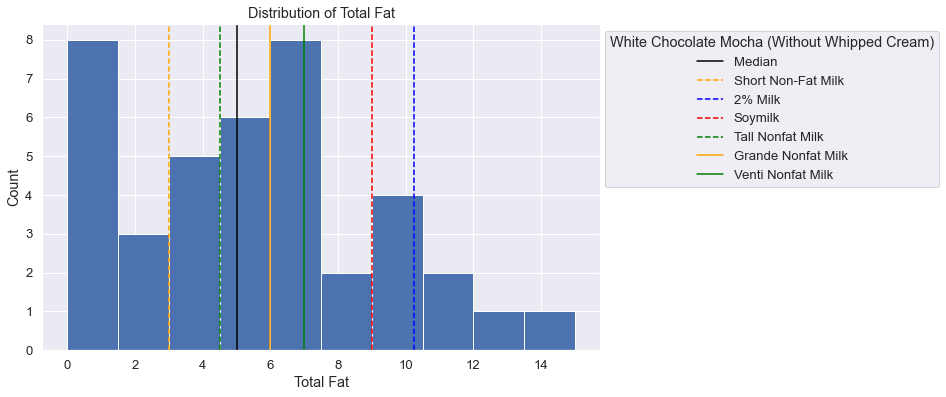

In [25]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Total_Fat(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Total_Fat(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Total_Fat(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Total_Fat(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Total_Fat(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Total_Fat(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Total_Fat(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Total_Fat(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Total Fat')
_ = plt.xlabel('Total Fat')
_ = plt.ylabel('Count')
_ = plt.savefig('total_fat.png', bbox_inches= 'tight')
_ = plt.show()

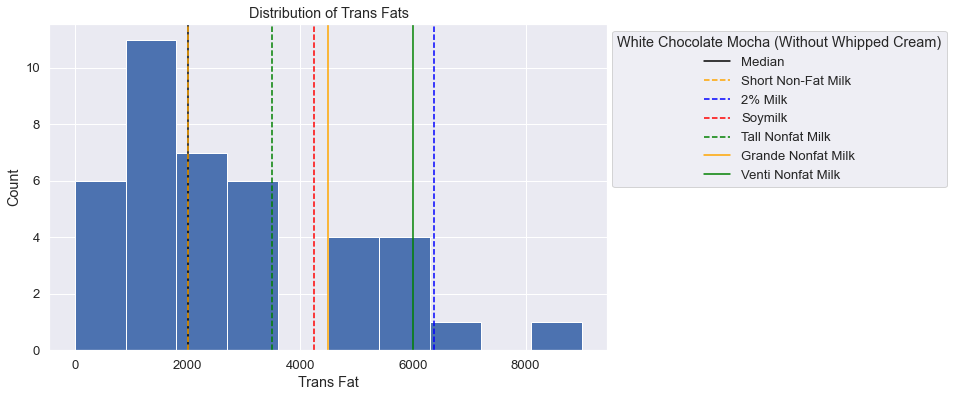

In [26]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Trans_Fat (mg)'].hist()
_ = plt.axvline(x=signature_espresso['Trans_Fat (mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Trans_Fat (mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Trans_Fat (mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Trans_Fat (mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Trans_Fat (mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Trans_Fat (mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Trans_Fat (mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Trans Fats')
_ = plt.xlabel('Trans Fat')
_ = plt.ylabel('Count')
_ = plt.savefig('transfat.png', bbox_inches= 'tight')
_ = plt.show()

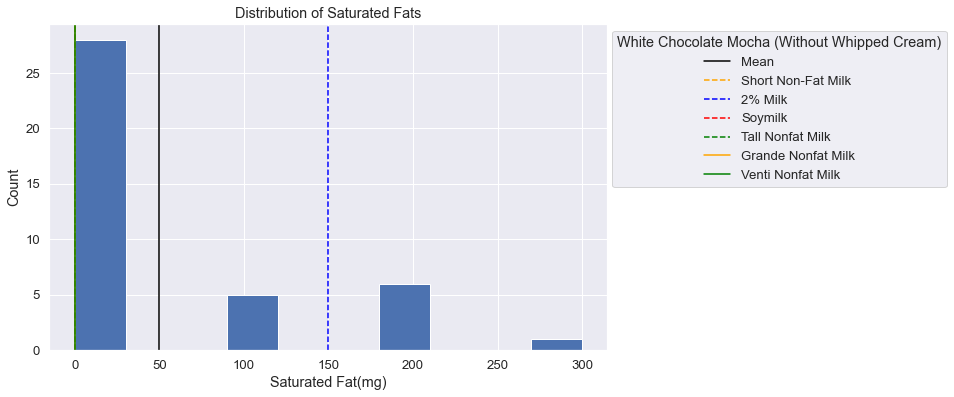

In [27]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Saturated_Fat(mg)'].hist(bins=10)
_ = plt.axvline(x=signature_espresso['Saturated_Fat(mg)'].mean(), c='black', label='Mean')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Saturated_Fat(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Saturated_Fat(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Saturated_Fat(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Saturated_Fat(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Saturated_Fat(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Saturated_Fat(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Saturated Fats')
_ = plt.xlabel('Saturated Fat(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('satfats.png', bbox_inches= 'tight')
_ = plt.show()

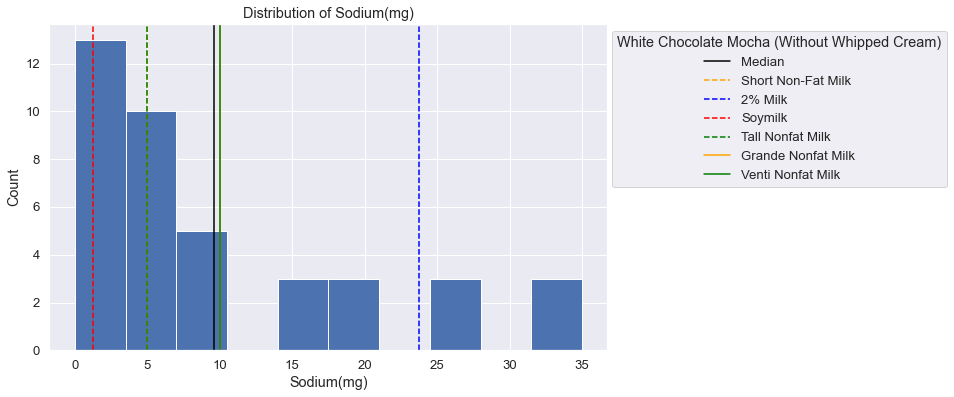

In [28]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Sodium(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Sodium(mg)'].mean(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Sodium(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Sodium(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Sodium(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Sodium(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Sodium(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Sodium(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Sodium(mg)')
_ = plt.xlabel('Sodium(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('sodium.png', bbox_inches= 'tight')
_ = plt.show()

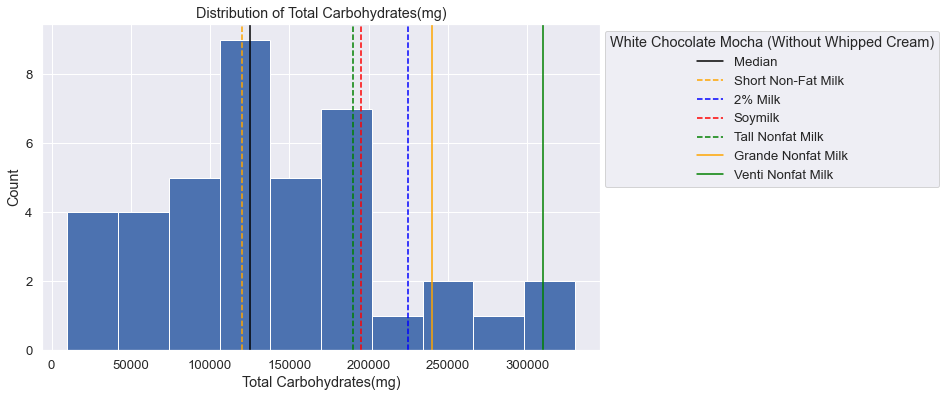

In [29]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Total_Carbohydrates(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Total_Carbohydrates(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Total_Carbohydrates(mg)'].median(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Total_Carbohydrates(mg)'].median(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Total_Carbohydrates(mg)'].median(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Total_Carbohydrates(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Total_Carbohydrates(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Total_Carbohydrates(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Total Carbohydrates(mg)')
_ = plt.xlabel('Total Carbohydrates(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('carbs.png', bbox_inches= 'tight')
_ = plt.show()

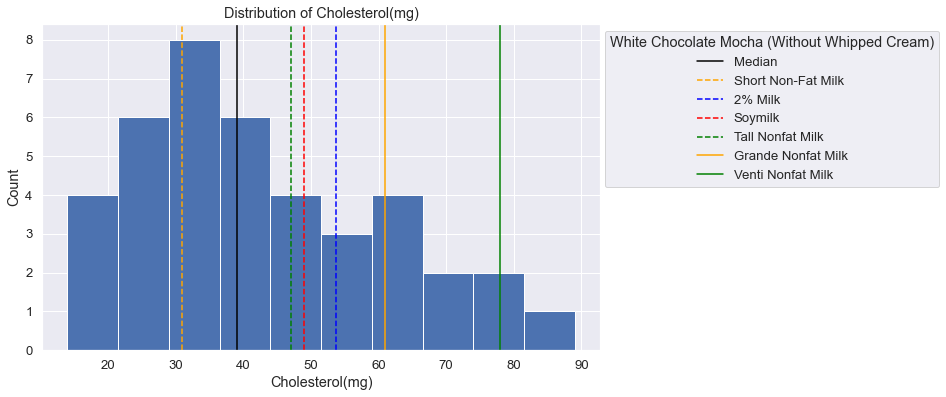

In [30]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Cholesterol(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Cholesterol(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Cholesterol(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Cholesterol(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Cholesterol(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Cholesterol(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Cholesterol(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Cholesterol(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Cholesterol(mg)')
_ = plt.xlabel('Cholesterol(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('cholesterol.png', bbox_inches= 'tight')
_ = plt.show()

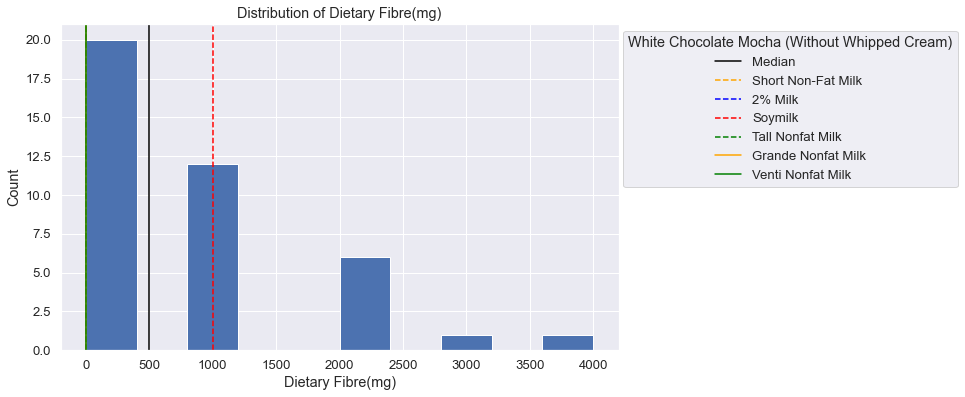

In [31]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Dietary_Fibre(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Dietary_Fibre(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Dietary_Fibre(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Dietary_Fibre(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Dietary_Fibre(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Dietary_Fibre(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Dietary_Fibre(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Dietary_Fibre(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Dietary Fibre(mg)')
_ = plt.xlabel('Dietary Fibre(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('fiber.png', bbox_inches= 'tight')
_ = plt.show()

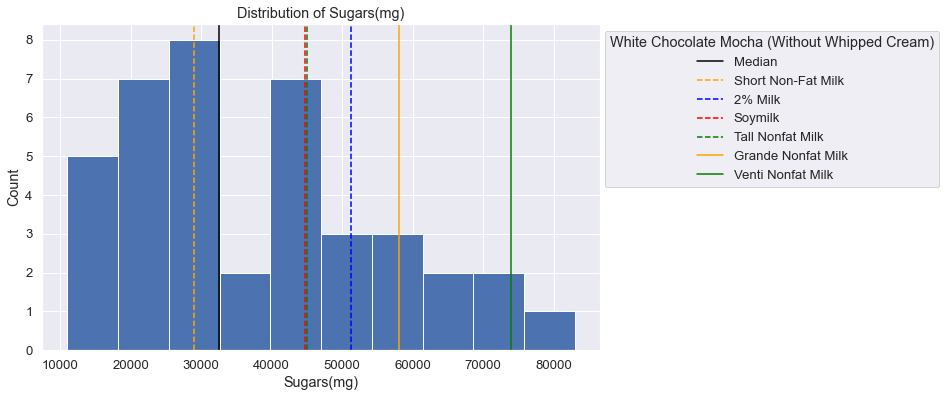

In [32]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Sugars(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Sugars(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Sugars(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Sugars(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Sugars(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Sugars(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Sugars(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Sugars(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Sugars(mg)')
_ = plt.xlabel('Sugars(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('sugars.png', bbox_inches= 'tight')
_ = plt.show()

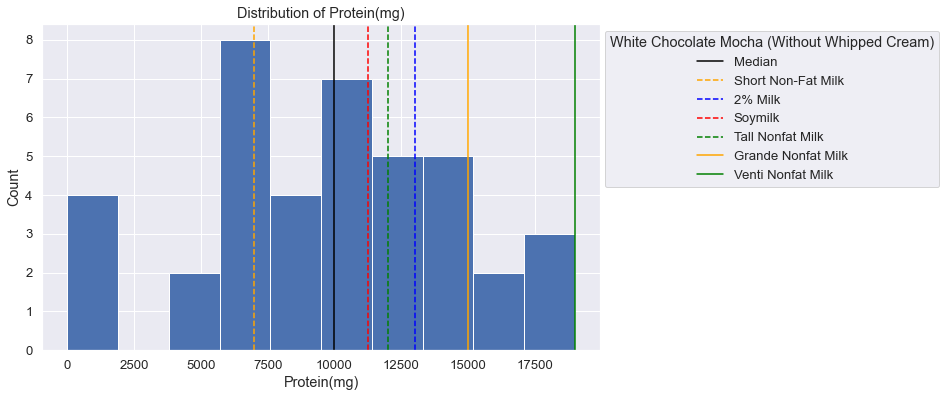

In [33]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Protein(mg)'].hist()
_ = plt.axvline(x=signature_espresso['Protein(mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Protein(mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Protein(mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Protein(mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Protein(mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Protein(mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Protein(mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Protein(mg)')
_ = plt.xlabel('Protein(mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('protein.png', bbox_inches= 'tight')
_ = plt.show()

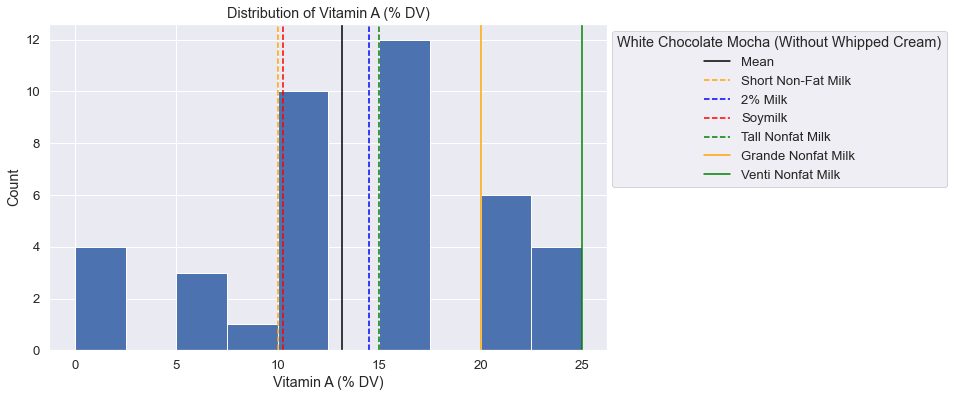

In [34]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['VitaminA(% DV)'].hist()
_ = plt.axvline(x=signature_espresso['VitaminA(% DV)'].mean(), c='black', label='Mean')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['VitaminA(% DV)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['VitaminA(% DV)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['VitaminA(% DV)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['VitaminA(% DV)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['VitaminA(% DV)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['VitaminA(% DV)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Vitamin A (% DV)')
_ = plt.xlabel('Vitamin A (% DV)')
_ = plt.ylabel('Count')
_ = plt.savefig('vitA.png', bbox_inches= 'tight')
_ = plt.show()

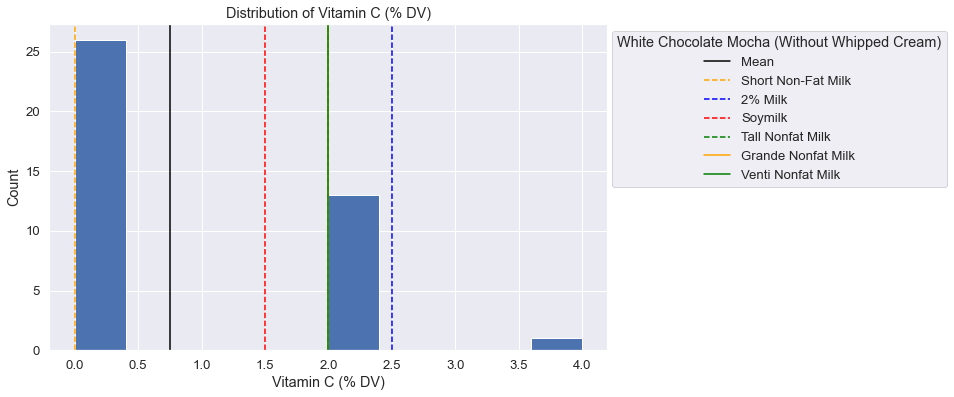

In [35]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['VitaminC(% DV)'].hist()
_ = plt.axvline(x=signature_espresso['VitaminC(% DV)'].mean(), c='black', label='Mean')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['VitaminC(% DV)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['VitaminC(% DV)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['VitaminC(% DV)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['VitaminC(% DV)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['VitaminC(% DV)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['VitaminC(% DV)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Vitamin C (% DV)')
_ = plt.xlabel('Vitamin C (% DV)')
_ = plt.ylabel('Count')
_ = plt.savefig('vitC.png', bbox_inches= 'tight')
_ = plt.show()

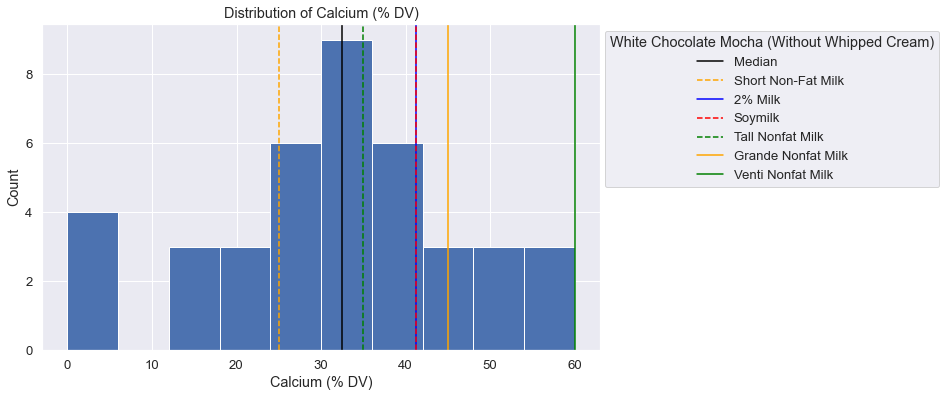

In [36]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Calcium(% DV)'].hist()
_ = plt.axvline(x=signature_espresso['Calcium(% DV)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Calcium(% DV)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Calcium(% DV)'].mean(), c='blue', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Calcium(% DV)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Calcium(% DV)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Calcium(% DV)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Calcium(% DV)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Calcium (% DV)')
_ = plt.xlabel('Calcium (% DV)')
_ = plt.ylabel('Count')
_ = plt.savefig('calcium.png', bbox_inches= 'tight')
_ = plt.show()

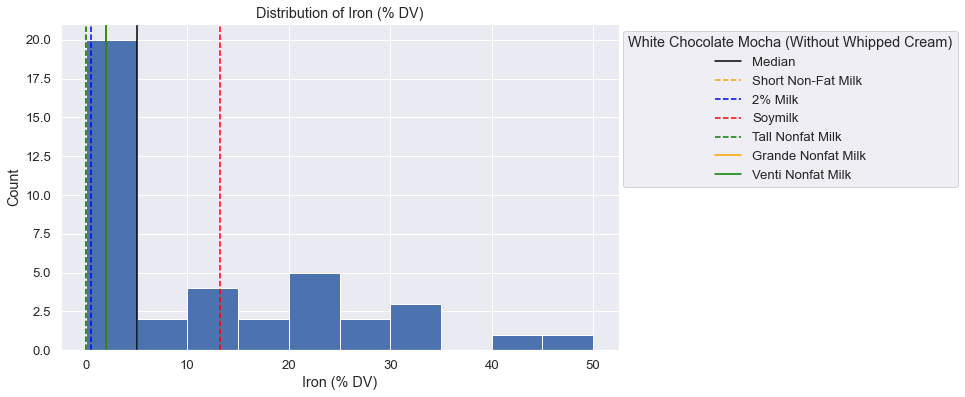

In [37]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Iron(% DV)'].hist()
_ = plt.axvline(x=signature_espresso['Iron(% DV)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Iron(% DV)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Iron(% DV)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Iron(% DV)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Iron(% DV)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Iron(% DV)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Iron(% DV)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Iron (% DV)')
_ = plt.xlabel('Iron (% DV)')
_ = plt.ylabel('Count')
_ = plt.savefig('iron.png', bbox_inches= 'tight')
_ = plt.show()

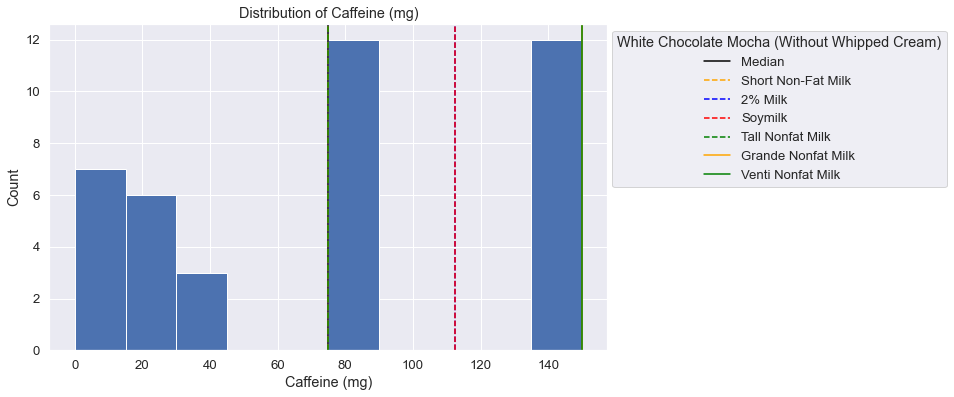

In [38]:
_ = plt.figure(figsize=(10,6))
_ = signature_espresso['Caffeine (mg)'].hist(bins=10)
_ = plt.axvline(x=signature_espresso['Caffeine (mg)'].median(), c='black', label='Median')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Short Nonfat Milk']['Caffeine (mg)'].mean(), c='orange', ls = '--', label='Short Non-Fat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='2% Milk']['Caffeine (mg)'].mean(), c='blue', ls = '--', label='2% Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Soymilk']['Caffeine (mg)'].mean(), c='red', ls = '--', label='Soymilk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Tall Nonfat Milk']['Caffeine (mg)'].mean(), c='green', ls = '--', label='Tall Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Grande Nonfat Milk']['Caffeine (mg)'].mean(), c='orange', label='Grande Nonfat Milk')
_ = plt.axvline(x=white_chocolate[white_chocolate['Beverage_prep']=='Venti Nonfat Milk']['Caffeine (mg)'].mean(), c='green', label='Venti Nonfat Milk')
_ = plt.legend(title = 'White Chocolate Mocha (Without Whipped Cream)',bbox_to_anchor=[1.62,1])
_ = plt.title('Distribution of Caffeine (mg)')
_ = plt.xlabel('Caffeine (mg)')
_ = plt.ylabel('Count')
_ = plt.savefig('caffeine.png', bbox_inches= 'tight')
_ = plt.show()

In [39]:
white_chocolate.columns

Index(['Beverage', 'Beverage_prep', 'Calories', 'Total_Fat(mg)',
       'Trans_Fat (mg)', 'Saturated_Fat(mg)', 'Sodium(mg)',
       'Total_Carbohydrates(mg)', 'Cholesterol(mg)', 'Dietary_Fibre(mg)',
       'Sugars(mg)', 'Protein(mg)', 'VitaminA(% DV)', 'VitaminC(% DV)',
       'Calcium(% DV)', 'Iron(% DV)', 'Caffeine (mg)'],
      dtype='object')

In [40]:
white_chocolate['Beverage_prep'].unique()

array(['Short Nonfat Milk', '2% Milk', 'Soymilk', 'Tall Nonfat Milk',
       'Grande Nonfat Milk', 'Venti Nonfat Milk'], dtype=object)

### Summary Findings
> __Calories__ <br>
As expected we see Short, Tall, Grande and Venti appear in ascending order. It's interesting to note that 2% Milk has higher calorie content than short and tall non fat variants, and the soymilk mochas has higher calorie content that grande but less than venti variants. Other than the short non-fat variants, all white chocolate mochas have higher calorie counts than the median espresso drinks. <br>
> __Total Fat__ <br>
The short and tall variants have lower total fat values than the median trans fat count of Signature Espresso Drinks. It's noteworthy, the 2% milk white chocolate mochas have the highest total fat content followed by the soymilk variant.<br>
> __Trans Fat__ <br>
The trans fat disribution is very similar to the distribution of calories where the only difference is that the 2% Milk has the highest trans fat count. It's noteworthy that short nonfat milk variant has the same transfat content as the median frans fat content of signature espresso drinks.  <br>
> __Saturated Fat__ <br>
The highest amount of saturated fat seems to be in 2% Milk variant of drinks, otherwsie all the other drinks have low saturated fats. <br>
> __Sodium__ <br>
The 2% Milk ranks the highest in sodium content for white chocolate mochas, and the venti non-fat variants stand just above the median sodium count for signature espresso drinks. <br>
> __Total Carbohydrates__ <br>
Other than short chite chocolate mochas, the remaining white chocolate variants place on the higher end of the total carbohydrates distributions for signature espresso drinks. 2% milk and soymilk variants of the white chocolate mocha fall between the tall and grande nonfat milk variants. <br>
> __Cholesterol__ <br>
We observe the exact same pattern for Cholesterol as total carbohydrates.
<br>
> __Dietary Fibre__ <br>
Soymilk white chocolate mochas have a signficantly more dietary fibre present than any white chocolate mochas, and it's noteworthy how wide the range of dietary fibre values are for signature espresso drinks. <br>
> __Sugars__ <br>
The sugar content, surprisingly, is the same soymilk and tall non fat milk variants for white chocolate mochas. The short non-fat have lower than the median sugar content of signature espresso drinks. Whilst the venti white chocolate mocha doesn't have the highest sugar content, it places relatively high in the distribution. The 2% milk variant is also surpirsingly higher than the median sugar content.  <br>
> __Protein__ <br>
As expected, The protein content for the non fat milk vaiants increases as the volumes increase. The shor non-fat variant has a lower protein content than the median count for signature espresso drinks. Furthermore, the venti non-fat milk ranks as one of the protein richest drinks in this category.<br>
> __Vitamen A__ <br>
Soymilk and the short non-fat milk white chcolate mocha have very similar vitamin A content, and both fall lower than the median vitamin a counts for signature espresso drinks. Perhaps due to volume, the grande and vonti nonfat milk variants are very high in vitamin content. It's worth noting that the 2% milk variant has lower vitamin a content than the tall nonfat milk variant. <br>
> __Vitamin C__ <br>
The highest Vitamin C concetrations are in 2% milk, soymilk, and venti drinks. By considering the mean Vitamin C concetration in signature espresso drinks, it's interesting how the short variant has lower than the mean Vitamin C concentrations. It might be suitable to infer that for the nonfat variants there might be a threshold volume required before any meanigful amount of Vitamin C is present. <br>
> __Calcium__<br>
The 2% Milk and Soymilk variants have the same calcium content for white chocolate mochas and they place higher than the medain calcium content for signature espresso drinks. The Venti has the highest calcium content which isn't surprising as it has the largest volume of milk.<br>
> __Iron__ <br>
Soymilk seems to be richest in iron, whilst the 2% Milk white chocolate mocha has a significantly lower iron content than the median iron content of signature espresso drinks. <br>
> __Caffeine__ <br>
There seems to be clear division in the sizes of the drinks which is in line with what we'd expect- as the sizes increase so does their caffein content. 

### Which white chocolate mocha to order?
Say we want to stick to this decadent drink but still would like to optimise our order for nutritional values. We will assume we want to reduce our calorie, sugar, fats, carbohydrates, sodium, and cholesterol content whilst maximizing vitamins, protiens, iron, and calcium. 

As expected, if we increase our non-fat options in size from short to venti their nutritional values increases. So, let's see how the 2% milk and the soy milk options compare to the various non-fat options. We can see that all of the white chocolate mochas are very low in saturated fats, other than the 2% Milk option. The soymilk option consistently is ranked worse than the short and tall non-variants for calories, fats, carbs and cholesterol, but better than the 2% milk option. Only when considering sugar content, we see that the soy and the tall non fat variants tie in place. So, by considering nutritional qualities that are considered negatives, the short, tall, and the soymilk options are the top three respectively.

Let's see how these three rank in the "good" nutritional qualities: in terms of protein, vitamins, diateary fibre, iron, and calcium. It's surprising that 2% Milk and soymilk has the sme calcium content. In addition, the soy milk option ranks higher only in iron but the 2% milk option consistently ranks higher in protein and both vitamins: vitamin A and vitamin C. the soymilk option also ranks consitently higher in good nutritional values than the short nonfat variant, but also beats the tall option in calcium and iron. 

If we are looking to balance the bad and good nutritional values, I'd recommend going for the soymilk white chocolate variant.

### Are all Signature Espresso Drinks the same?
When it comes to ordering at Starbucks, we all have our favourites. If you are really after a Signature Espresso drink rather than specifically the White Chocolate Mocha, let's see how the other drinks stack up. 

In [41]:
sig_espresso = clean_data[clean_data.index =='Signature Espresso Drinks'].groupby('Beverage').median()

In [42]:
# convert back to milligrams so the data is easy plot
sig_espresso[['Total_Fat(mg)','Trans_Fat (mg)', 'Saturated_Fat(mg)', 'Sodium(mg)',
              'Total_Carbohydrates(mg)', 'Cholesterol(mg)', 'Dietary_Fibre(mg)',
              'Sugars(mg)', 'Protein(mg)', 'Caffeine (mg)']] = sig_espresso[['Total_Fat(mg)','Trans_Fat (mg)', 'Saturated_Fat(mg)', 'Sodium(mg)',
              'Total_Carbohydrates(mg)', 'Cholesterol(mg)', 'Dietary_Fibre(mg)',
              'Sugars(mg)', 'Protein(mg)','Caffeine (mg)']]/1000
#rename the columns to grams 
sig_espresso.columns = ['Calories', 'Total_Fat(g)', 'Trans_Fat (g)', 'Saturated_Fat(g)','Sodium(g)',
                               'Total_Carbohydrates(g)', 'Cholesterol(g)','Dietary_Fibre(g)', 'Sugars(g)', 
                               'Protein(g)', 'VitaminA(% DV)','VitaminC(% DV)', 'Calcium(% DV)', 
                               'Iron(% DV)', 'Caffeine (g)']

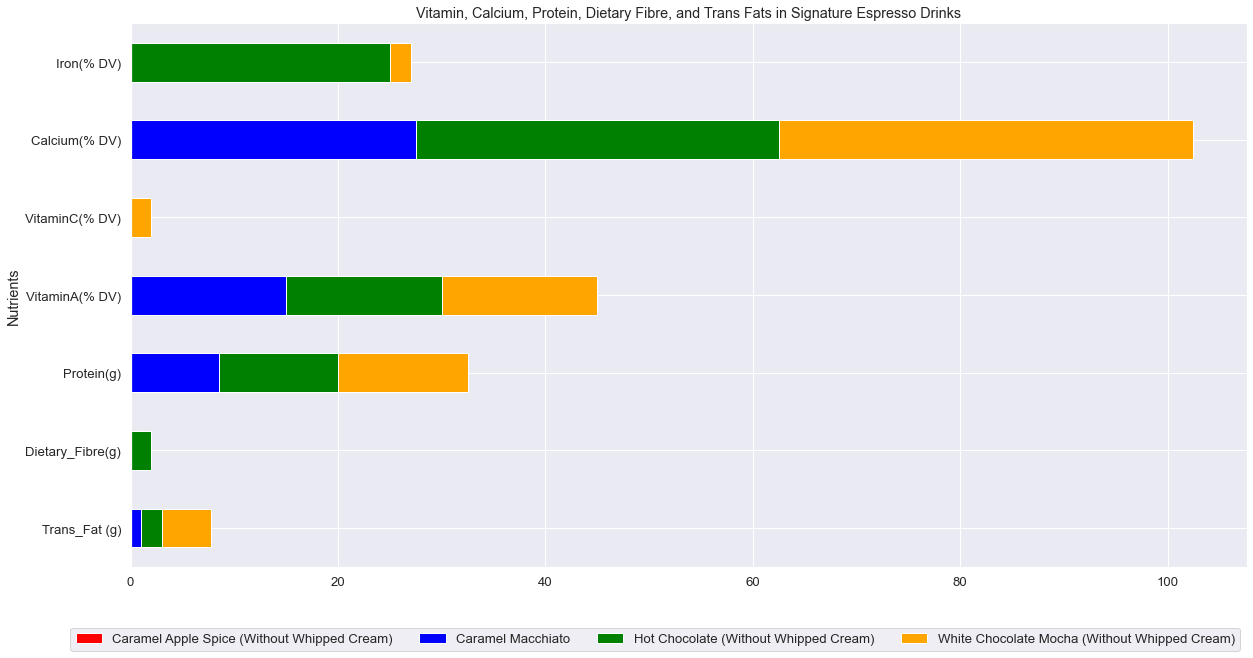

In [44]:
_ = sig_espresso[['Trans_Fat (g)', 'Dietary_Fibre(g)', 'Protein(g)', 
                  'VitaminA(% DV)','VitaminC(% DV)', 'Calcium(% DV)', 'Iron(% DV)']].T.plot(kind='barh', stacked= True, color=['red', 'blue', 'green', 'orange'])
_ = plt.gcf().set_size_inches(20,10)
_ = plt.legend(bbox_to_anchor=[1,-0.1], ncol=len(sig_espresso.columns))
_ = plt.title('Vitamin, Calcium, Protein, Dietary Fibre, and Trans Fats in Signature Espresso Drinks')
_ = plt.ylabel('Nutrients')
_ = plt.savefig('sig_drinks_nutrients3.png', bbox_inches= 'tight')
_ = plt.show()

<Figure size 720x432 with 0 Axes>

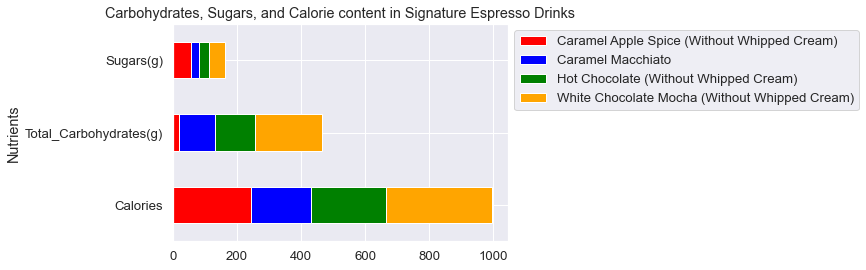

In [45]:
_ = plt.figure(figsize=(10,6))
_ = sig_espresso[['Calories', 'Total_Carbohydrates(g)', 'Sugars(g)']].T.plot(kind='barh', stacked= True, color=['red', 'blue', 'green', 'orange'])
_ = plt.legend(bbox_to_anchor=[1,1])
_ = plt.title('Carbohydrates, Sugars, and Calorie content in Signature Espresso Drinks')
_ = plt.ylabel('Nutrients')
_ = plt.savefig('sig_drinks_nutrients2.png', bbox_inches= 'tight')
_ = plt.show()

<Figure size 1440x432 with 0 Axes>

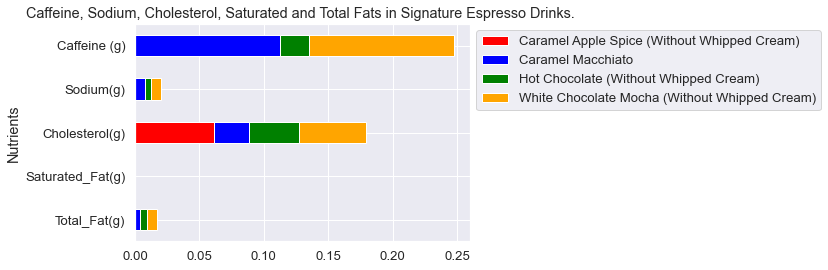

In [46]:
_ = plt.figure(figsize=(20,6))
_ = sig_espresso[['Total_Fat(g)', 'Saturated_Fat(g)','Cholesterol(g)','Sodium(g)', 'Caffeine (g)']].T.plot(kind='barh', stacked= True, color=['red', 'blue', 'green', 'orange'])
_ = plt.legend(bbox_to_anchor=[1,1])
_ = plt.title('Caffeine, Sodium, Cholesterol, Saturated and Total Fats in Signature Espresso Drinks. ')
_ = plt.ylabel('Nutrients')
_ = plt.savefig('sig_drinks_nutrients.png', bbox_inches = 'tight')

### So, what is the most nutritious signature espresso drink Starbucks has to offer?
The hot chocolate mocha is the clear winner here. While it has a high caffeine and cholesterol content and comparable carbohydrate, sodium, and calories, the hot chocolate also has very high amounts of calcium, protein, and Vitamin A. Furthermore, the hot chocolate mocha also ranks the highest in dietary fibre compared to all other Signature Espresso Drinks. 

### Are all drinks made the same?

Well, no. As more and more people become health conscious, Starbucks has also been evolving to accommodate for dieatry choices: whether it is for health reasons or taste, once you have selected a drink you have to make the choice of which size and preparation type to go for. Let's now explore which beverage preparation optimises nutritional value. 



In [47]:
grams = clean_data
grams[['Total_Fat(mg)','Trans_Fat (mg)', 'Saturated_Fat(mg)', 'Sodium(mg)',
              'Total_Carbohydrates(mg)', 'Cholesterol(mg)', 'Dietary_Fibre(mg)',
              'Sugars(mg)', 'Protein(mg)', 'Caffeine (mg)']] = grams[['Total_Fat(mg)','Trans_Fat (mg)', 'Saturated_Fat(mg)', 'Sodium(mg)',
              'Total_Carbohydrates(mg)', 'Cholesterol(mg)', 'Dietary_Fibre(mg)',
              'Sugars(mg)', 'Protein(mg)','Caffeine (mg)']]/1000
grams.columns = ['Beverage', 'Beverage_prep', 'Calories', 'Total_Fat(g)', 'Trans_Fat (g)', 'Saturated_Fat(g)','Sodium(g)',
                               'Total_Carbohydrates(g)', 'Cholesterol(g)','Dietary_Fibre(g)', 'Sugars(g)', 
                               'Protein(g)', 'VitaminA(% DV)','VitaminC(% DV)', 'Calcium(% DV)', 
                               'Iron(% DV)', 'Caffeine (g)']
grams = grams.groupby('Beverage_prep').median()

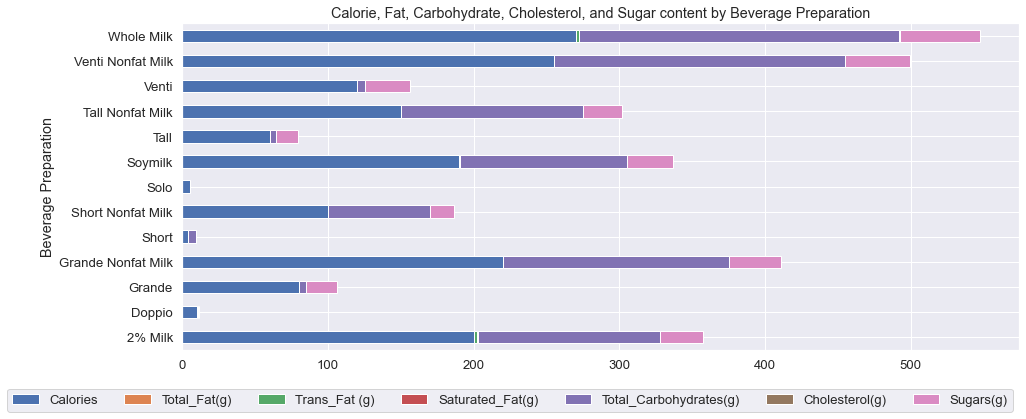

In [48]:
_ = grams[['Calories','Total_Fat(g)','Trans_Fat (g)', 'Saturated_Fat(g)',
         'Total_Carbohydrates(g)', 'Cholesterol(g)', 'Sugars(g)']].plot(kind='barh', stacked=True)
_ = plt.legend(bbox_to_anchor=[1,-0.1], ncol=len(grams.columns))
_ = plt.gcf().set_size_inches(15, 6)
_ = plt.title('Calorie, Fat, Carbohydrate, Cholesterol, and Sugar content by Beverage Preparation')
_ = plt.ylabel('Beverage Preparation')
_ = plt.savefig('Nutrients_by_Bev_Prep2.png', bbox_inches= 'tight')
_ = plt.show()


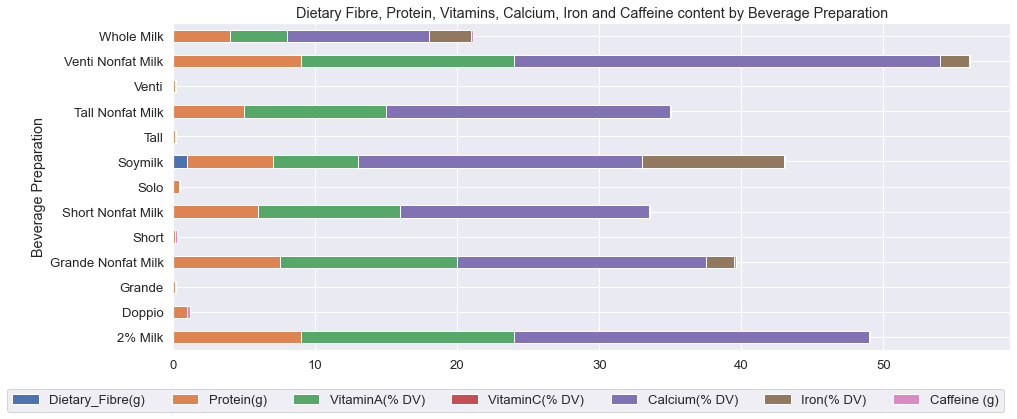

In [49]:
_ = grams[['Dietary_Fibre(g)','Protein(g)', 'VitaminA(% DV)',
       'VitaminC(% DV)', 'Calcium(% DV)', 'Iron(% DV)', 'Caffeine (g)']].plot(kind='barh', stacked=True)
_ = plt.legend(bbox_to_anchor=[1,-0.1], ncol=len(grams.columns))
_ = plt.gcf().set_size_inches(15, 6)
_ = plt.title('Dietary Fibre, Protein, Vitamins, Calcium, Iron and Caffeine content by Beverage Preparation')
_ = plt.ylabel('Beverage Preparation')
_ = plt.savefig('Nutrients_by_Bev_Prep.png', bbox_inches= 'tight')
_ = plt.show()

#### Customisng your order
It looks like the major choice lies, unsurprisingly, between non-fat milk, soymilk, 2% milk, and whole milk. When evaluating the nutirtional distributions, we see that soymilk and 2% milk are the clear winners at balancing calories, carboydrates and sugars with calcium, protein and vitamin A. In addtition, soymilk also has a consideriable amount of dieatry fibre and iron. This echos the conclusion we drew when looking at white chocolate mochas. If you are looking to settle your starbucks craving without it taking a toll on your daily diet, the soymilk variantes are a great choice. If soymilk isn't quite up your alley, the 2% milk options won't be that damaging of an alternative. 